In [ ]:
import os

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget -q https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

In [ ]:
TRAIN_DIR = "./cats_and_dogs_filtered/train"
VAL_DIR = "./cats_and_dogs_filtered/validation"

Image shape: (374, 500, 3)
Pixel in range: 0 255


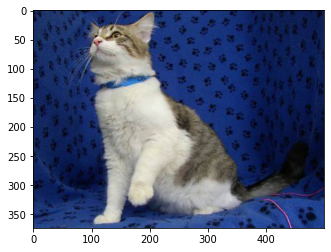

In [ ]:
i = 2
label = "cats"
train_sample_fn = os.listdir(os.path.join(TRAIN_DIR, label))[i]
train_sample_path = os.path.join(TRAIN_DIR, label, train_sample_fn)

img = Image.open(train_sample_path)
img_data = np.asarray(img)

print("Image shape:", img_data.shape)
print("Pixel in range:", np.min(img_data), np.max(img_data))
plt.imshow(img_data);

In [ ]:
IMG_SIZE = (224, 224)
INP_SHAPE = (*IMG_SIZE, 3)
BATCH_SIZE = 64

def gen_new_data(data_folder, augmented=True):
  if augmented:
    data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                  width_shift_range=0.2, height_shift_range=0.2,
                                  horizontal_flip=True)
  else:
    data_gen = ImageDataGenerator(rescale=1./255)

  data = data_gen.flow_from_directory(
      data_folder,
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      class_mode="binary",
  )
  return data

In [ ]:
ds_train = gen_new_data(TRAIN_DIR, augmented=True)
ds_val = gen_new_data(VAL_DIR, augmented=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2022-08-26 13:15:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  43.2MB/s    in 1.9s    

2022-08-26 13:15:54 (43.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 12, 12, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)
        

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(ds_train, epochs=15, validation_data=ds_val)

Epoch 1/15
32/32 [==============================] - 47s 1s/step - loss: 0.6411 - acc: 0.8460 - val_loss: 0.4257 - val_acc: 0.8330
Epoch 2/15
32/32 [==============================] - 29s 899ms/step - loss: 0.1728 - acc: 0.9320 - val_loss: 0.2733 - val_acc: 0.9150
Epoch 3/15
32/32 [==============================] - 29s 894ms/step - loss: 0.1320 - acc: 0.9485 - val_loss: 0.1229 - val_acc: 0.9530
Epoch 4/15
32/32 [==============================] - 28s 888ms/step - loss: 0.1005 - acc: 0.9615 - val_loss: 0.1645 - val_acc: 0.9470
Epoch 5/15
32/32 [==============================] - 29s 895ms/step - loss: 0.1019 - acc: 0.9605 - val_loss: 0.0536 - val_acc: 0.9790
Epoch 6/15
32/32 [==============================] - 29s 911ms/step - loss: 0.0933 - acc: 0.9655 - val_loss: 0.1674 - val_acc: 0.9530
Epoch 7/15
32/32 [==============================] - 29s 895ms/step - loss: 0.1116 - acc: 0.9625 - val_loss: 0.0664 - val_acc: 0.9780
Epoch 8/15
32/32 [==============================] - 29s 893ms/step - los

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
BatchNormalization()